# [A Grammar of Graphics for Python — plotnine](http://plotnine.readthedocs.io/en/stable/index.html)
* [tutorial](http://plotnine.readthedocs.io/en/stable/tutorials.html)
* [ggplot2-cheatsheet](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)

In [1]:
# !pip install plotnine

In [2]:
!pip show plotnine

Name: plotnine
Version: 0.3.0
Summary: A grammar of graphics for python
Home-page: https://github.com/has2k1/plotnine
Author: Hassan Kibirige
Author-email: has2k1@gmail.com
License: GPL-2
Location: /Users/corazzon/codes/jupyter/lib/python3.6/site-packages
Requires: statsmodels, mizani, pandas, scipy, six, matplotlib, patsy, numpy
Required-by: 


In [3]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)

0.21.0
1.14.0


In [4]:
from plotnine import * # 시각화 도구인 plotnine import

# 불필요한 warnings을 찍지 않기 위해 import 해왔습니다. 
import warnings
warnings.filterwarnings('ignore')

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
# 크롤링해 온 국민청원 데이터를 판다스를 통해 읽어온다.
df = pd.read_csv('data/petition.csv', parse_dates=['start', 'end'])

# 데이터의 크기가 어느정도인지 본다.
df.shape

(211690, 8)

In [6]:
# 전체 데이터로 보면 너무 느리기 때문에 본인의 관심사에 맞는 데이터를 가져옵니다.
child = df.loc[(df.title.str.contains('돌봄|육아|초등|보육', regex=True)) & \
           (df.content.str.contains('돌봄|육아|초등|보육', regex=True))] 
child.shape

(2099, 8)

In [7]:
child.head(3)

,article_id,start,end,answered,votes,category,title,content
23,45,2017-08-19,2017-11-17,0,0,육아/교육,초등학교 교사 임용 시험 관련 해결방안,초등학교 교사 임용 시험을 수능 시험 처럼 전국 단위로 실시하고난 후에\n1지망 2...
49,72,2017-08-20,2017-11-18,0,212,육아/교육,초등학교의 영어회화전문강사를 비롯한 강사들의 무기계약 전환 시도는 교육대학교와 초등...,초등학교의 영어회화전문강사를 비롯한 강사들의 무기계약 전환 시도는 교육대학교와 초등...
360,387,2017-08-23,2017-09-22,0,1166,육아/교육,"유치원방과후 강사, 유치원 돌봄교사를 무기계약직 정규직으로 전환하는 것에 반대합니다","기회는 평등하게, 과정은 공정하게, 결과는 정의롭게~!\n대통령님 안녕하세요. 유치..."


In [8]:
child.tail(3)

,article_id,start,end,answered,votes,category,title,content
211552,273198,2018-06-17,2018-07-17,0,1,육아/교육,초등학교 저학년(1학년~) 교과서 내용을 타인의도움이 없이도 공부가 가능도록 만들어...,이제 입학을 해서 초등학교에서 ㄱㄴ을 배우는 아이들은 같은학년 특히수학이나 다른 책...
211575,273222,2018-06-17,2018-07-17,0,47,육아/교육,보육교사가 하는 일이 뭔지 알고 계신가요,안녕하세요 저는 보육교사로 일하고 있는 한 여성입니다.\n보육교사로 일하면서 힘들어...
211606,273261,2018-06-17,2018-07-17,0,218,보건복지,현실에 맞는 보육료 지원 요청,어린이집을 7시 30분부터 19시 30분까지 의무 보육을 하라 하십니다~ 교사 근무...


In [9]:
child.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 23 to 211606
Data columns (total 8 columns):
article_id    2099 non-null int64
start         2099 non-null datetime64[ns]
end           2099 non-null datetime64[ns]
answered      2099 non-null int64
votes         2099 non-null int64
category      2099 non-null object
title         2099 non-null object
content       2099 non-null object
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 147.6+ KB


In [10]:
child.describe()

,article_id,answered,votes
count,2099.000000,2099.0,2099.000000
mean,100970.143878,0.0,271.887566
std,80652.163078,0.0,3386.092521
min,45.000000,0.0,0.000000
25%,17866.000000,0.0,2.000000
50%,78185.000000,0.0,5.000000
75%,168512.500000,0.0,20.000000
max,273261.000000,0.0,95167.000000


In [11]:
child.describe(include=np.object)

,category,title,content
count,2099,2099,2099
unique,15,1762,1869
top,육아/교육,초등돌봄교실 지자체 이관 반대,초등돌봄교실은 학교 안에서 학부모와 학생으로부터 신뢰를 바탕으로 만족도가 1위인 정...
freq,1396,69,30


## 시계열 데이터 보기

In [12]:
child['start_year'] = child['start'].dt.year
child['start_month'] = child['start'].dt.month
child['start_day'] = child['start'].dt.day
child['start_hour'] = child['start'].dt.hour
child['start_dow'] = child['start'].dt.dayofweek
child['start_wdn'] = child['start'].dt.weekday_name

# 요일을 좀 더 간단하게 표현해 봅니다.
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
child['start_dayofweek'] = child['start_dow'].apply(lambda x: days[x])
child.shape

(2099, 15)

In [13]:
# 월별 데이터 보기
child['start_month'].value_counts()

9     482
12    311
1     252
4     206
2     178
5     177
3     173
11    107
8      93
6      65
10     55
Name: start_month, dtype: int64

In [14]:
# 요일별 데이터 보기
child['start_dayofweek'].value_counts()

Weds     412
Thurs    402
Tues     393
Mon      310
Fri      288
Sat      152
Sun      142
Name: start_dayofweek, dtype: int64

In [15]:
# 요일별 데이터 보기
# 육아, 보육과 관련된 청원을 내는 사람들은 보통 수요일에 청원을 많이 내고 주말에는 적게 내는 것을 알수 있습니다.
child['start_wdn'].value_counts()

Wednesday    412
Thursday     402
Tuesday      393
Monday       310
Friday       288
Saturday     152
Sunday       142
Name: start_wdn, dtype: int64

## 한글폰트 사용하기
* 한글이 깨져보이는 것을 해결하기 위해 한글폰트를 사용해야 합니다.
* 여기에서는 나눔바른고딕을 사용하도록 합니다.
    * 이때 폰트가 로컬 컴퓨터에 설치되어 있어야해요.
    * 나눔고딕은 무료로 사용할 수 있는 폰트입니다.
    * 참고 : [네이버 나눔글꼴 라이선스](https://help.naver.com/support/contents/contents.nhn?serviceNo=1074&categoryNo=3497)
* 한글을 사용하기 위해서는 ggplot에서 theme에 폰트를 지정해 주면됩니다.
* 아래의 문서를 참고하면 **element_text**와 관련된 옵션을 볼 수 있습니다.
* 참고 : [plotnine.themes.element_text — plotnine 0.3.0 documentation](http://plotnine.readthedocs.io/en/stable/generated/plotnine.themes.element_text.html)

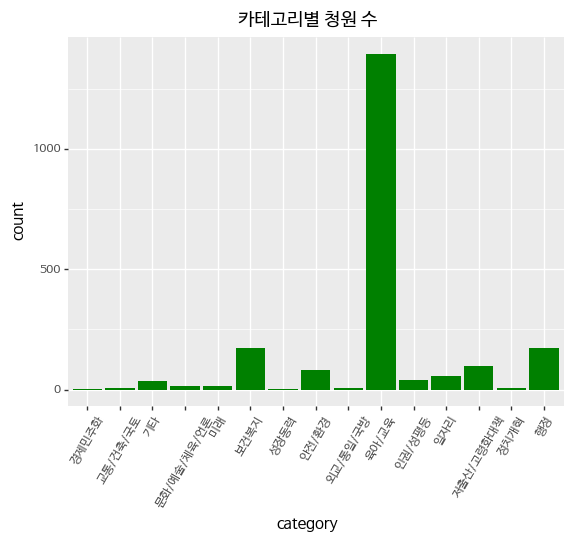

<ggplot: (-9223372036580218189)>

In [16]:
# 카테고리별 청원 수
(ggplot(child)
 + aes('category')
 + geom_bar(fill='#8181F7')
 + ggtitle('카테고리별 청원 수')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60))
)

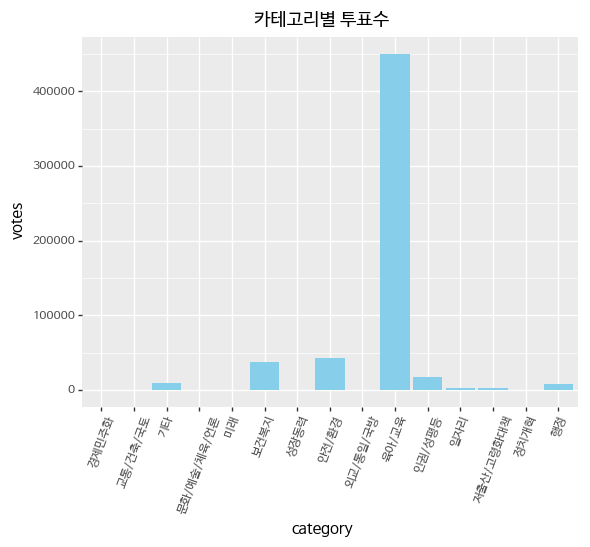

<ggplot: (-9223372036562230268)>

In [17]:
# 카테고리별 투표수
(ggplot(child)
 + aes(x='category', y='votes')
 + geom_col(fill='skyblue')
 + ggtitle('카테고리별 투표수')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=70))
)

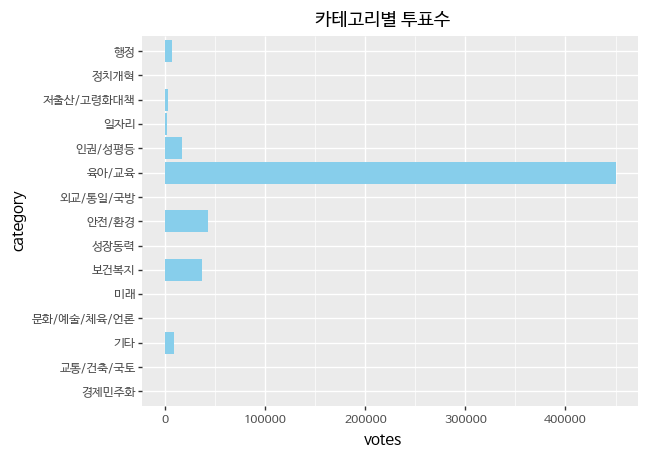

<ggplot: (292565999)>

In [18]:
# coord_flip을 사용해서 x축과 y축을 바꿔본다.
(ggplot(child)
 + aes(x='category', y='votes')
 + geom_col(fill='skyblue')
 + ggtitle('카테고리별 투표수')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
)

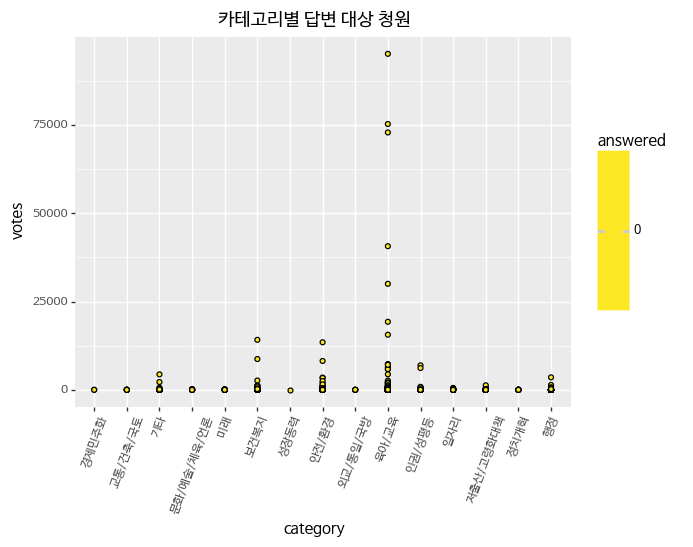

<ggplot: (-9223372036561840710)>

In [19]:
(ggplot(child) 
 + aes(x='category', y='votes', fill='answered')
 + geom_point()
 + ggtitle('카테고리별 답변 대상 청원')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=70))
)

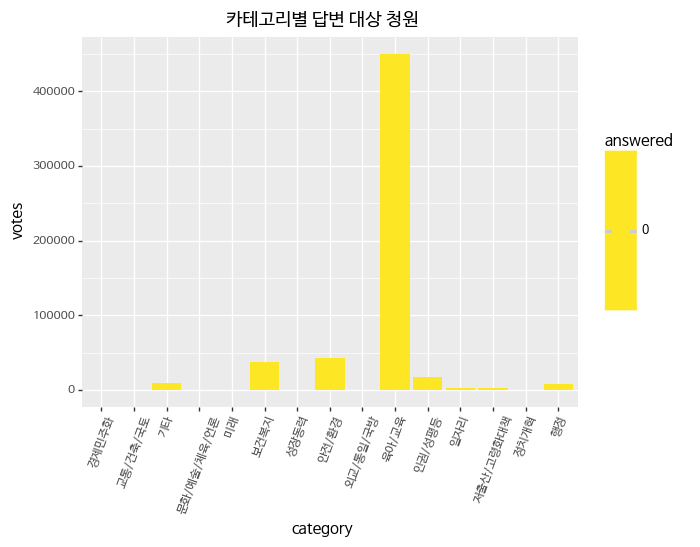

<ggplot: (-9223372036561884861)>

In [20]:
(ggplot(child, aes(x='category', y='votes', fill='answered'))
 + geom_col()
 + ggtitle('카테고리별 답변 대상 청원')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=70))
)

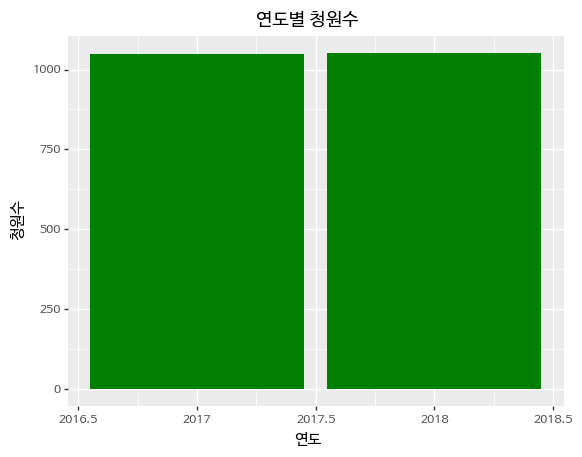

<ggplot: (-9223372036560717133)>

In [21]:
# 연도별 청원수는 크게 의미가 없다.
(ggplot(child)
 + aes('start_year')
 + geom_bar(fill='green')
 + labs(y='청원수', x='연도', title='연도별 청원수')
 + theme(text=element_text(family='NanumBarunGothic'))
)

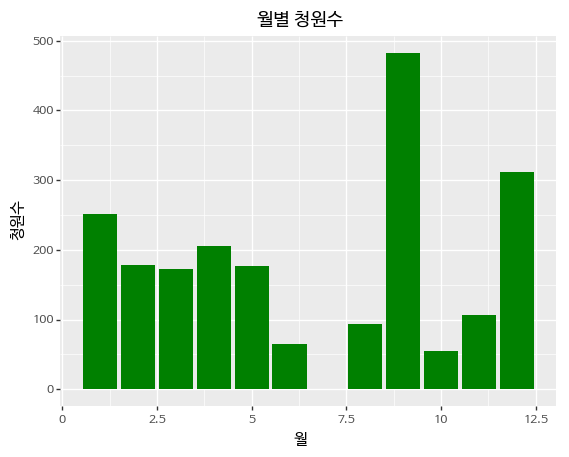

<ggplot: (-9223372036561622005)>

In [22]:
(ggplot(child)
 + aes('start_month')
 + geom_bar(fill='green')
 + labs(y='청원수', x='월', title='월별 청원수')
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [23]:
# 9월에 청원이 특히 많은데 상위 3개 날짜만 뽑아보자
child_9 = child.loc[child['start_month'] == 9]
child_9['start_day'].value_counts()[:3]

26    75
20    68
21    44
Name: start_day, dtype: int64

In [24]:
child_9_sample = child_9.loc[(child_9['start_day'] == 26) | (child_9['start_day'] == 20)]
child_9_sample[['title', 'content', 'votes']].sort_values(by='votes', ascending=False)[:20]

,title,content,votes
17052,초등돌봄교실 지자체 이관을 반대합니다,학부모들이 돌봄교실에 자녀를\n믿고 맡기는 것은 학교가 관리하기 때문인데 운영주체가...,7
15251,초등돌봄교실 지자체 이관을 절대 반대합니다.,초등돌봄교실은 학교 안에서 학부모와 학생으로부터 신뢰를 바탕으로 만족도가 1위인 정...,6
15254,돌봄교실 지자체이관반대,초등돌봄교실은 학교 안에서 학부모와 학생으로부터 신뢰를 바탕으로 만족도가 1위인 정...,6
15292,초등돌봄교실 지자체 이관을 반대합니다,초등돌봄교실 지자체 이관 반대입니다.\n돌봄전담사 의견을 들어봐 주세요....\n학...,6
16901,울산초등학교(울산광역시 중구 소재) 수직증축 철회 강력히 요청합니다,울산초등학교(울산광역시 중구 소재) 수직증축 철회 강력히 요청합니다,6
17054,돌봄교실 지자체이관을 결사반대합니다!!!,돌봄전담사가 가장 우려하는 점은 시설은 학교에 있고 그 운영주체는 지자체가 맡아 분...,6
17027,돌봄교실의 지자체 이관 결사 반대한다.,돌봄교실은 학교 안에서의 가정이고 엄마의 중요한 자리다. 가정교육의 중요성은 익히...,6
16956,초등돌봄교실 지자체 이관을 절대 반대합니다,돌봄전담사가 가장 우려하는 점은 시설은 학교에 있고 그 운영주체는 지자체가 맡아 분...,5
17067,초등돌봄교실 지자체 이관 반대,초등돌봄교실 이용 아동은 저학년입니다. 지역아동센터는 중학생까지 관리를 합니다. 어...,5
17049,초등돌봄교실 지자체 이관반대,돌봄교실은 학교 안에서 운영되어야 안정적으로 운영됩니다. 돌봄교실이 과연 무엇을 하...,5


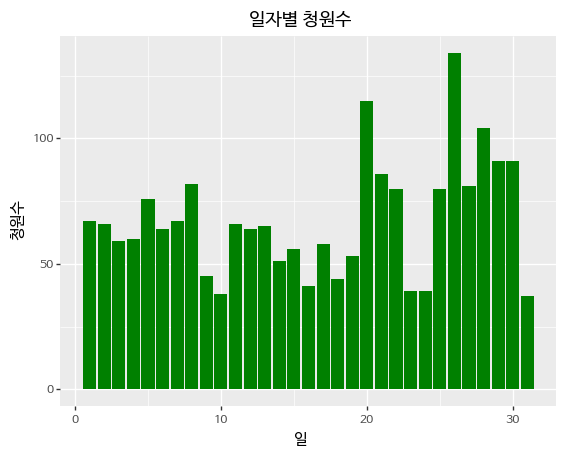

<ggplot: (-9223372036558777712)>

In [25]:
(ggplot(child)
 + aes('start_day')
 + geom_bar(fill='green')
 + labs(y='청원수', x='일', title='일자별 청원수')
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [26]:
# 그래프를 그리다가 컬럼명이 떠오르지 않으면 위로 올라가지 않고 바로 컬럼명을 찍어 봅니다.
child.columns

Index(['article_id', 'start', 'end', 'answered', 'votes', 'category', 'title',
       'content', 'start_year', 'start_month', 'start_day', 'start_hour',
       'start_dow', 'start_wdn', 'start_dayofweek'],
      dtype='object')

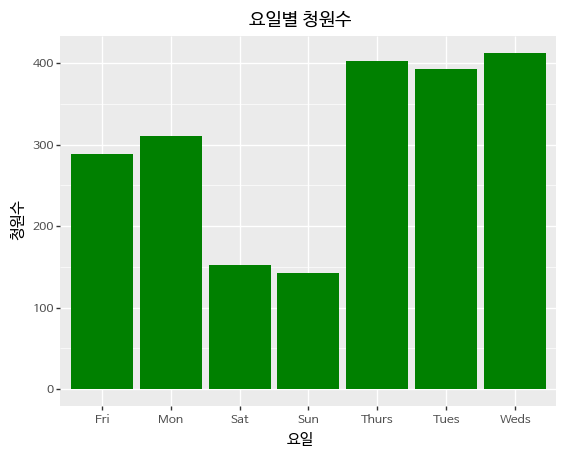

<ggplot: (-9223372036558733610)>

In [27]:
(ggplot(child)
 + aes('start_dayofweek')
 + geom_bar(fill='green')
 + labs(y='청원수', x='요일', title='요일별 청원수')
 + theme(text=element_text(family='NanumBarunGothic'))
)

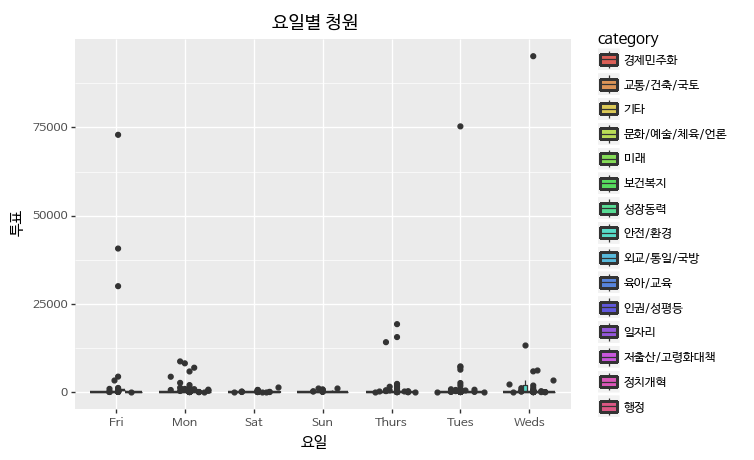

<ggplot: (298091661)>

In [28]:
# 박스플롯을 그려볼까요?
(ggplot(child, aes(x='start_dayofweek', y='votes', fill='category'))
 + geom_boxplot()
 + labs(y='투표', x='요일', title='요일별 청원')
 + theme(text=element_text(family='NanumBarunGothic'))
)

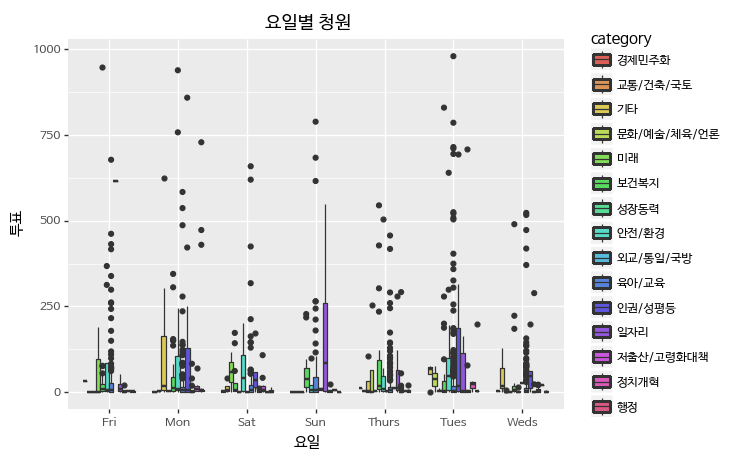

<ggplot: (-9223372036556591535)>

In [29]:
# 그래프를 좀 더 자세하게 보기 위해 투표수가 특정 건 이하인 데이터만 모아본다.
child_votes_25000 = child.loc[child['votes'] < 1000]

(ggplot(child_votes_25000, aes(x='start_dayofweek', y='votes', fill='category'))
 + geom_boxplot()
 + labs(y='투표', x='요일', title='요일별 청원')
 + theme(text=element_text(family='NanumBarunGothic'))
)